### Deep Learning Framework
![dl_frameworks_rank](img/DL_libraries_rank.png)
### Comparision
![dl_frameworks_compare](img/dl_framework_compare.png)

### What is TensorFlow(TF) ?
#### Definition of tensor and tensorflow 
in order to understand what is tensorflow we need first to understand what is tensor. in particular, a tensor, put simply, is a n-dimensional matrix. So a 2-dimensional tensor 
is the same as a standard matrix; we can view a (m x m x m) tensor as a cube array of numbers. from the definition of tensor, the definition of TensorFlow comes as "an opensource software library for numerical computation using data flow graph"
#### Data flow graphs 
this is the computational model for TensorFlow where the nodes are functions/computations and the edges are numbers, matrices or tensor 
![data flow graph](img/data_flow_graphs.png)
There are number of reasons this is useful. Fist, many common  machine learning models (Neural Networks) are directed graphs. Second,TF can easily computes derivative of any node and this is the heart of neural network optimization. Finally, this enables distributing across multiple computational devices (GPUs)
![title](img/multi_tensor_graphs.png)
#### Main components of TF
##### TensorFlow 
this is the API for defining machine learning models, training them with data and exporting them for further use 
##### TensorBoard 
this is graph visulization software that is included with any standard TF installation 
##### TensorFlow Serving 
this is software that facilitates easy deployment of pre-trained TF models


#### TF - Hello World
##### TF Installation
The installation will be much less painful and easy for you if you are in linux; just following two steps: 
1. create a virtual environment (conda or virtul env)
2. pip install tensorflow (cpu) or pip install tensorflow-gpu (gpu)

if you own a MAC you it is easy to install tensorflow (cpu) but for gpu support you might need to build it from source:
--> follow the official guile https://www.tensorflow.org/install/install_sources

if you install TF successfully, you might want to try out these lines of code 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

/Users/daniel/envs/bocr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


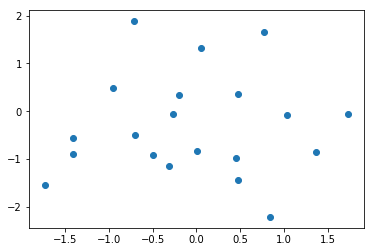

In [2]:
a = tf.random_normal([2,20])
sess = tf.Session()
out = sess.run(a)
x,y = out 
plt.scatter(x,y)
plt.show()

let's go over what the rest of the code does:
1. Use TF to create 2x20 matrix of random number and assign it to the variable a 
2. Start a TF session and assign it to sess 
3. Execute a with the sess.run() method and assign the output (which is a NumPy array) to out 
4. Split up the 2x20 matrix into two 1x10 vectors, x and y 
5. Use pyplot to create a scatter plot with x and y 

#### Fundamental TensorFlow Concepts

##### Graph basics 
At the core of every TensorFlow program is the computation graph described in code
with the TensorFlow API. A computation graph, is a specific type of directed graph that is
used for defining, unsurprisingly, computational structure. In TensorFlow it is, in essence,
a series of functions chained together, each passing its output to zero, one, or more
functions further along in the chain. In this way, a user can construct a complex
transformation on data by using blocks of smaller, well-understood mathematical
functions. Let’s take a look at a bare-bones example.
![title](img/gb1.png)
In the above example, we see the graph for basic addition. The function, represented by
a circle, takes in two inputs, represented as arrows pointing into the function. It outputs the
result of adding 1 and 2 together: 3, which is shown as an arrow pointing out of the
function. The result could then be passed along to another function, or it might simply be
returned to the client.
We can also look at this graph as a simple equation:
The above illustrates how the two fundamental building blocks of graphs, nodes and
edges, are used when constructing a computation graph. Let’s go over their properties:
Nodes, typically drawn as circles, ovals, or boxes, represent some sort of
computation or action being done on or with data in the graph’s context. In the above
example, the operation “add” is the sole node.
Edges are the actual values that get passed to and from Operations, and are typically
drawn as arrows. In the “add” example, the inputs 1 and 2 are both edges leading into
the node, while the output 3 is an edge leading out of the node. Conceptually, we can
think of edges as the link between different Operations as they carry information
from one node to the next

##### Dependencies
The concept of a dependency is straight-forward: any node, A, that is required for the
computation of a later node, B, is said to be a dependency of B. If a node A and node B do
not need any information from one another, they are said to be independent. To visually
represent this, let’s take a look at what happens if the multiplication node c is unable to
finish its computation (for whatever reason):
![title](img/gb2.png)

##### Building your first TensorFlow graph
![title](img/gb3.png)
Here’s what it looks like in TensorFlow code:

In [3]:
tf.reset_default_graph()
a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

In [4]:
sess = tf.Session()
sess.run(e)

23

In [5]:
sess.close()

##### Let's try a larger graph

![title](img/large_graph.png)
this is the graph thay we will build 

The first thing we’ll need to do, as always, is import the TensorFlow library:

In [6]:
#import tensorflow as tf
#skip this if you have already imported  

We’re going to explicitly create the graph that we’d like to use instead of using the
default graph, so make one with tf.Graph():

In [7]:
graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("variables"):
        # Variable to keep track of how many times the graph has been run
        global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name="global_step")
        # Variable that keeps track of the sum of all output values over time:
        total_output = tf.Variable(0.0, dtype=tf.float32, trainable=False, name="total_output")
    with tf.name_scope("transformation"):
        # Separate input layer
        with tf.name_scope("input"):
            # Create input placeholder- takes in a Vector
            a = tf.placeholder(tf.float32, shape=[None], name="input_placeholder_a")
        # Separate middle layer
        with tf.name_scope("intermediate_layer"):
            b = tf.reduce_prod(a, name="product_b")
            c = tf.reduce_sum(a, name="sum_c")
        # Separate output layer
        with tf.name_scope("output"):
            output = tf.add(b, c, name="output")
    with tf.name_scope("update"):
        # Increments the total_output Variable by the latest output
        update_total = total_output.assign_add(output)
        # Increments the above `global_step` Variable, should be run whenever the graph is run
        increment_step = global_step.assign_add(1)
    with tf.name_scope("summaries"):
        avg = tf.div(update_total, tf.cast(increment_step, tf.float32), name="average")
        tf.summary.scalar('output_summary',output)
        tf.summary.scalar('average_summary', avg)
        tf.summary.scalar('total_summary',update_total)
    with tf.name_scope("global_ops"):
        # Initialization Op
        init = tf.global_variables_initializer()
        # Merge all summaries into one Operation
        merged_summaries = tf.summary.merge_all()

##### Run the graph

In [8]:
sess = tf.Session(graph=graph)
writer =  tf.summary.FileWriter('./summary', graph)
sess.run(init)
def run_graph(input_tensor):
    feed_dict = {a: input_tensor}
    _, step, summary = sess.run([output, increment_step, merged_summaries],feed_dict=feed_dict)
    writer.add_summary(summary, global_step=step)

In [9]:
run_graph([2,8])
run_graph([3,1,3,3])
run_graph([8])
run_graph([1,2,3])
run_graph([11,4])
run_graph([4,1])
run_graph([7,3,1])
run_graph([6,3])
run_graph([0,2])
run_graph([4,5,6])

In [10]:
writer.flush()

run command tensorboard --logdir ./summary and access to localhost:6006 to visulize the result 
it should look like:
![title](img/tf1.png)
![title](img/tf2.png)